In [208]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [209]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

In [210]:
train.head(5)
#ages, cabin columns contain some missing values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [211]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [212]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [213]:
train.describe()
#The titanic has an average of 38% survival rate

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [214]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

S:\New folder\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
S:\New folder\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
S:\New folder\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


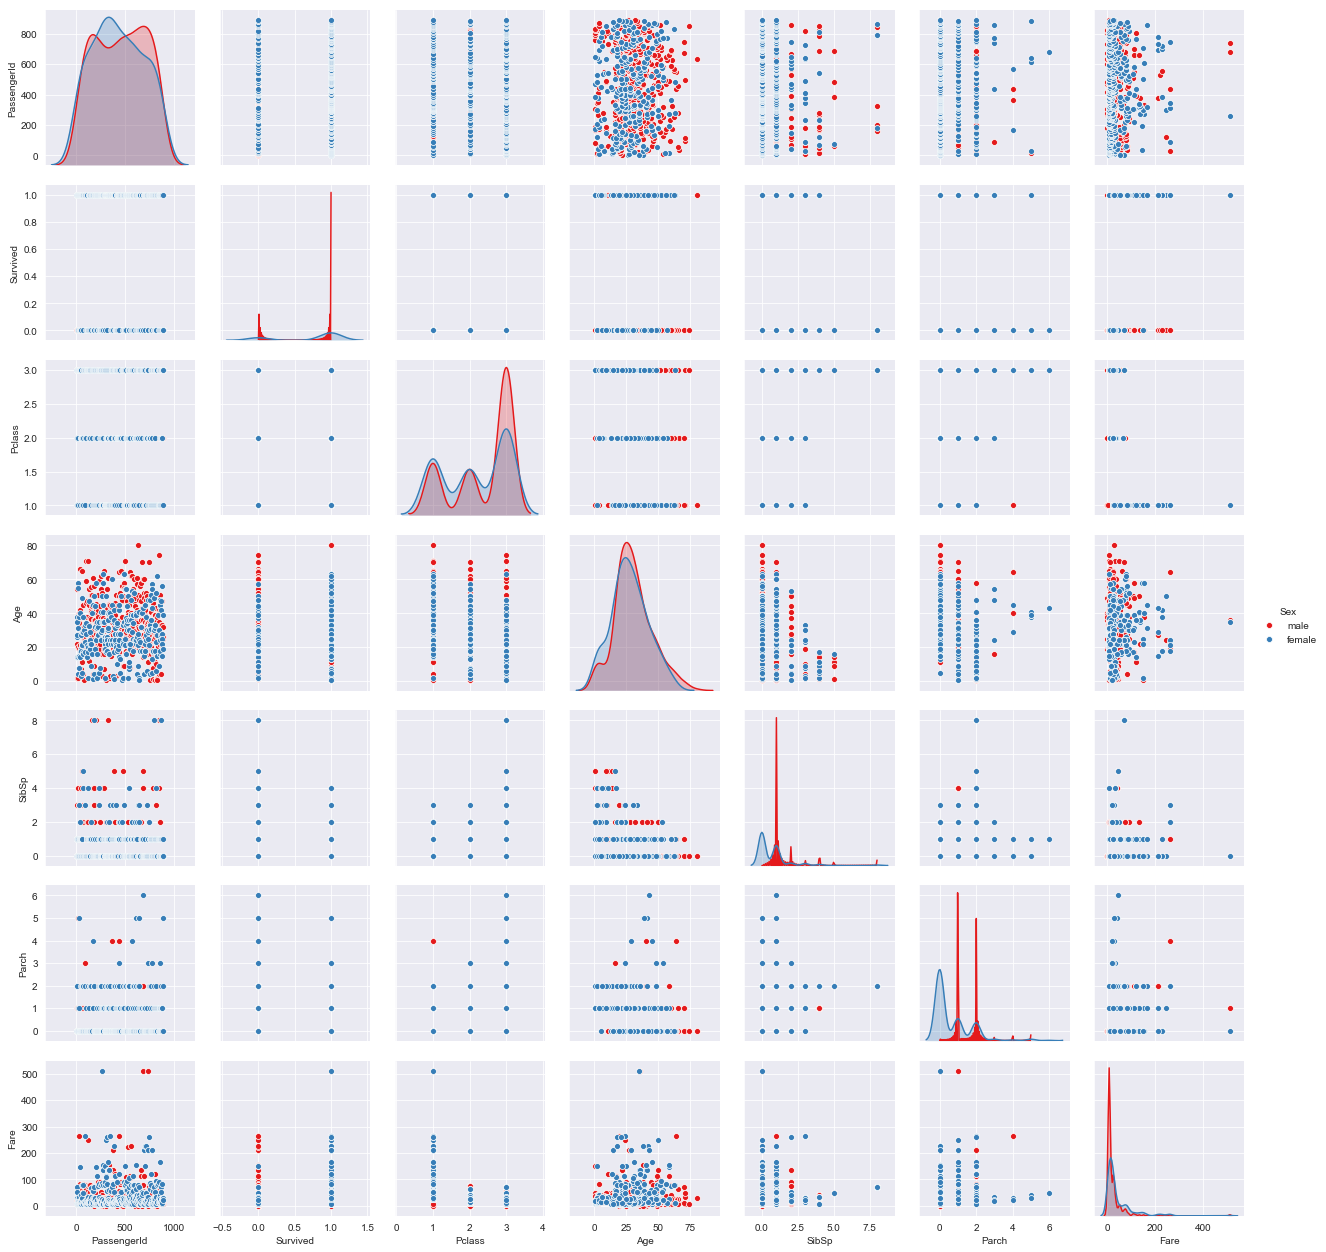

In [215]:
sns.pairplot(data=train,palette='Set1',hue='Sex')

In [216]:
train.groupby('Pclass').mean()
#The survival rate also depends on the class of the passenger
#we can see that maximum people survived from the first class (62%) while third 
#class has worst survival rate(24%)
# we can also infer that maximum people from third class were young(avg_age=25)
#The fare of the first class was quite high as compared to other classes

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


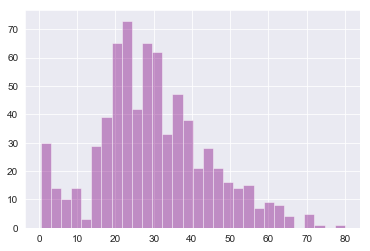

In [217]:
train['Age'].dropna().hist(bins=30,color='purple',alpha=0.4)
#The ship contains mostly young people around the age of 20-25

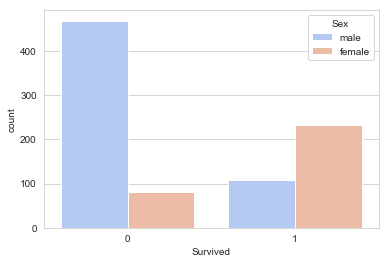

In [218]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='coolwarm')
#We see that being a female will have maximum chances of survival

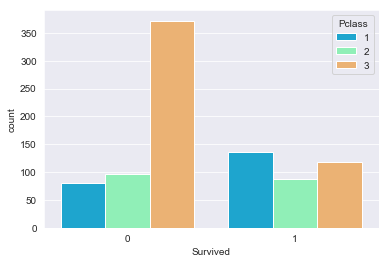

In [219]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')
#The passengers of the third class have the least survival rate
#while most passengers from first and second class did survive

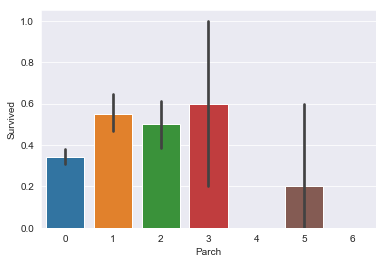

In [220]:
sns.barplot(x="Parch", y="Survived", data=train)
#people with 1-3 children or parent are more likely to survive than those with more or no children or parent

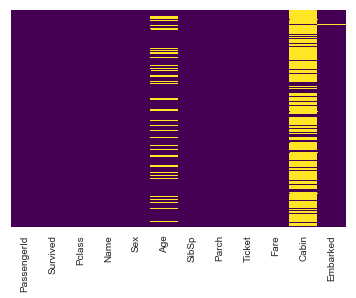

In [221]:
#To check the missing values of the columns
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#the cabin column has many missing values

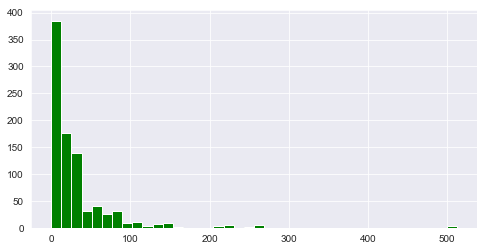

In [222]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))
#maximum people were from third class hence the fare is quite low for those people

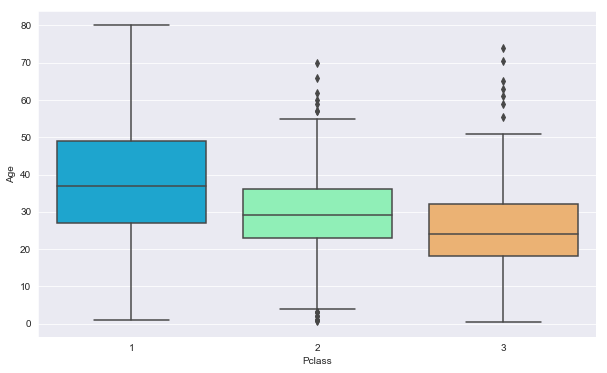

In [223]:
#for the average age of people by class
plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass',y='Age',data=train,palette='rainbow')

In [224]:
#to clean the age column lets replace the missing values by the average age of each class
def new_age(col):
    Age = col[0]
    Pclass = col[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age 

In [225]:
train['Age'] = train[['Age','Pclass']].apply(new_age,axis=1)
test['Age'] = test[['Age','Pclass']].apply(new_age,axis=1)

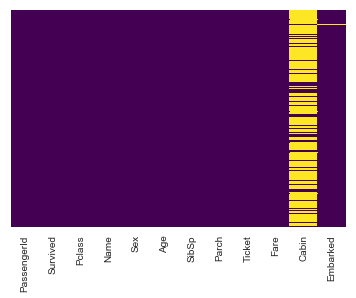

In [226]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#we filled all missing age rows

In [227]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [228]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [229]:
train = pd.concat([train,sex,embark],axis=1)

In [230]:
train.drop('Cabin',axis=1,inplace=True)

In [231]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [232]:
sex_t = pd.get_dummies(test['Sex'],drop_first=True)
embark_t = pd.get_dummies(test['Embarked'],drop_first=True)

In [233]:
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [234]:
test = pd.concat([test,sex_t,embark_t],axis=1)

In [235]:
test.drop('Cabin',axis=1,inplace=True)

In [236]:
test.dropna(inplace=True)

In [237]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [238]:
#splitting our data
from sklearn.model_selection import train_test_split

In [239]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [240]:
#Building our models...lets start with logistic regression
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression()
model_1.fit(X_train,y_train)

S:\New folder\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [243]:
predictions = model_1.predict(X_test)
#print(predictions)

In [303]:
#from sklearn.metrics import classification_report,confusion_matrix
##print(classification_report(y_test,predictions))
#print('\n')
#print(confusion_matrix(y_test,predictions))
print(model_1.score(X_test,y_test))

0.7761194029850746


In [304]:
#the logistic regression did well but not up to the mark....lets try another model

Text(0, 0.5, 'error_rate')

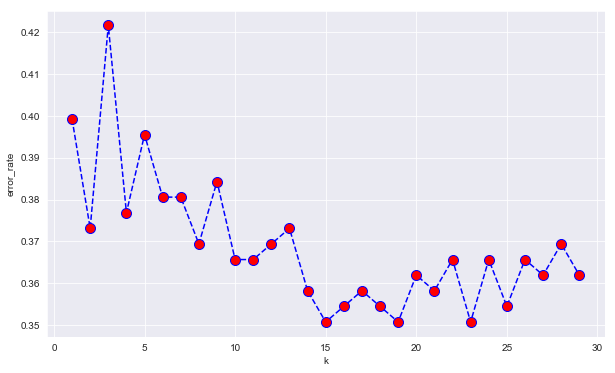

In [305]:
#lets build a k-nearest neighbors model
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,30):
    model_2 = KNeighborsClassifier(n_neighbors=i)
    model_2.fit(X_train,y_train)
    pred_i = model_2.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue',marker='o',linestyle='dashed',markersize=10,markerfacecolor='red')
plt.xlabel('k')
plt.ylabel('error_rate')

In [306]:
model_2 = KNeighborsClassifier(n_neighbors=15)
model_2.fit(X_train,y_train)
pred = model_2.predict(X_test)
#print(classification_report(y_test,pred))
#print('\n')
#print(confusion_matrix(y_test,pred))
print(model_2.score(X_test,y_test))

0.6492537313432836


In [307]:
#decision trees

In [308]:
from sklearn.tree import DecisionTreeClassifier

In [309]:
dtree = DecisionTreeClassifier(random_state=0,max_depth=10)

In [310]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [311]:
predict = dtree.predict(X_test)
print(dtree.score(X_test,y_test))

0.7574626865671642


In [312]:

print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       154
           1       0.79      0.64      0.71       114

   micro avg       0.78      0.78      0.78       268
   macro avg       0.78      0.76      0.76       268
weighted avg       0.78      0.78      0.77       268



[[135  19]
 [ 41  73]]


In [313]:
#random forest

In [314]:
from sklearn.ensemble import RandomForestClassifier

In [315]:
rfc = RandomForestClassifier()

In [316]:
rfc.fit(X_train,y_train)

S:\New folder\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [333]:
mod_pred = rfc.predict(X_test)
#print(classification_report(y_test,predictions))
#print('\n')
#print(confusion_matrix(y_test,predictions))
print(rfc.score(X_test,y_test))

0.832089552238806


In [291]:
#support vector machines

In [319]:
from sklearn.svm import SVC

In [320]:
model = SVC()

In [321]:
model.fit(X_train,y_train)

S:\New folder\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [322]:
preds = model.predict(X_test)

In [323]:
print(model.score(X_test,y_test))
#print(classification_report(y_test,predictions))
#print('\n')
#print(confusion_matrix(y_test,predictions))

0.5597014925373134


In [324]:
#naive bayes

In [325]:
from sklearn.naive_bayes import MultinomialNB

In [326]:
mode = MultinomialNB()

In [327]:
mode.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [328]:
mode_pred = mode.predict(test)

In [329]:
print(mode.score(X_test,y_test))
#print(classification_report(y_test,predictions))
#print('\n')
#print(confusion_matrix(y_test,predictions))

0.6716417910447762


In [330]:
#we can see that random forest has a good score

In [331]:
surv_model = RandomForestClassifier()

In [332]:
surv_model.fit(X_train,y_train)

S:\New folder\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [334]:
my_prediction = surv_model.predict(test)

In [335]:
print(my_prediction)

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 1
 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1
 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0
 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0
 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0
 0 1 1 1 0 0 1 0 0 0]
